In [2]:
# import basics 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict, Counter

In [3]:
import pickle
import glob
import json
from tqdm.notebook import tqdm

In [4]:
import random
import seaborn as sns
import colorcet as cc

In [5]:
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

In [6]:
from sklearn.decomposition import PCA

In [7]:
import numpy.typing as nptyping
from typing import List, Dict

In [8]:
# Set up LaTeX fonts
#plt.style.use(['no-latex'])
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams['text.usetex'] = True
#plt.rcParams['text.latex.unicode'] = True
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'Liberation Sans', 'Bitstream Vera Sans', 'sans-serif']

In [9]:
# read embedding dict from disk
embedding_file = "../data/doc2embedding.pkl"

with open(embedding_file, "rb") as file:
    doc2embedding: Dict[str, Dict] = pickle.load(file)

In [10]:
# read embedding dict from disk
embedding_file = "../data/doc2embedding_2.pkl"

with open(embedding_file, "rb") as file:
    doc2embedding_2: Dict[str, Dict] = pickle.load(file)

In [11]:
# read embedding dict from disk
embedding_file = "../data/doc2embedding_topics.pkl"

with open(embedding_file, "rb") as file:
    doc2embedding_topics: Dict[str, Dict] = pickle.load(file)

In [12]:
# read embedding dict from disk
embedding_file = "../data/doc2embedding_only_topics.pkl"

with open(embedding_file, "rb") as file:
    doc2embedding_only_topics: Dict[str, Dict] = pickle.load(file)

In [46]:
# read embedding dict from disk
embedding_file = "../data/doc2embedding_full_document.pkl"

with open(embedding_file, "rb") as file:
    doc2embedding_full_documents: Dict[str, Dict] = pickle.load(file)

In [13]:
documents: List = list(doc2embedding.keys())
embeddings: nptyping.ArrayLike = np.array(list(doc2embedding.values()))

In [14]:
embeddings_2: nptyping.ArrayLike = np.array(list(doc2embedding_2.values()))

In [15]:
embeddings_with_topics: nptyping.ArrayLike = np.array(
    list(doc2embedding_topics.values())
)

In [16]:
embeddings_only_topics: nptyping.ArrayLike = np.array(
    list(doc2embedding_only_topics.values())
)

In [57]:
embeddings_full_documents: nptyping.ArrayLike = np.array(
    list(doc2embedding_full_documents.values())
)

In [59]:
categories_full_documents: List = [] 

for doc in list(doc2embedding_full_documents.keys()): 
    try: 
        categories_full_documents.append(
            doc2json[doc]['scientific_discipline']
        )
    except: 
        categories_full_documents.append('Other')

In [17]:
embeddings.shape

(17486, 384)

In [18]:
# read dictionary for classifier results 
embedding_file = "../data/doc2results_1660_1920.pkl"

with open(embedding_file, "rb") as file:
    categories_by_classifier_dict: Dict[str, Dict] = pickle.load(file)

In [19]:
# to get categories, read JSON files
json_files: List = [
    json_file_id.split('/')[-1][:-5]
    for json_file_id in glob.glob('../data/json_files/*.json')
]

doc2json: Dict[str, Dict] = {}

for doc in tqdm(json_files):
    # open the file in read mode
    file_path = "../data/json_files/" + doc + ".json"
    with open(file_path, "r", encoding='utf-8',) as file:
        # Load the JSON data
        doc2json[doc] = json.load(file)

  0%|          | 0/17486 [00:00<?, ?it/s]

In [20]:
categories: List = [
    doc2json[doc]['scientific_discipline'] for doc in documents
]

In [21]:
zeroshot_classifier_categories: List = [
    categories_by_classifier_dict[doc][1][0] 
    for doc in documents
]

zeroshot_classifier_categories_2: List = [
    categories_by_classifier_dict[doc][1][1] 
    for doc in documents
]

In [22]:
agreements = 0

num_total = len(doc2embedding)
for i in range(num_total):
    if zeroshot_classifier_categories[i] == categories[i]:
        agreements += 1

agreements / num_total


0.6586411986732243

In [23]:
agreements = 0

num_total = len(doc2embedding)

for i in range(num_total):
    if zeroshot_classifier_categories_2[i] == categories[i]:
        agreements += 1

agreements / num_total


0.17471119752945213

In [139]:
tsne = TSNE(n_components=2, perplexity=100, random_state=42, verbose=0)

tsne_embeddings: np.array = tsne.fit_transform(embeddings)

In [140]:
tsne_embeddings_2: np.array = tsne.fit_transform(embeddings_2)

In [141]:
tsne_embeddings_topics: np.array = tsne.fit_transform(
    embeddings_with_topics
)

In [142]:
tsne_embeddings_only_topics: np.array = tsne.fit_transform(
    embeddings_only_topics
)

In [143]:
tsne_embeddings_full_documents: np.array = tsne.fit_transform(
    embeddings_full_documents
)

In [144]:
category2color: Dict[str, str] = {
    'Biology & Life Sciences': '#2E7D32',  # Earthy dark green, connecting with the environment
    'Medicine & Health Sciences': 'maroon',  # Deep pink, conveying care and attention
    'Environmental & Earth Sciences': 'darkgoldenrod', #'darkbrown', # Brown, representing the earth and environment
    'Physics': 'dodgerblue', #'#1976D2',  # Medium blue, indicating clarity and precision
    'Astronomy': 'navy', #'#0D47A1',  # Deep blue, representing the vastness of space
    'Engineering & Technology': 'yellowgreen', #'gold', #'#F57C00',  # Bright orange, representing innovation and creativity
    'Mathematics & Statistics': '#6A1B9A',  # Amethyst purple, symbolizing complexity and depth
    'Social Sciences & Humanities': 'pink',  # Dark brown, suggesting tradition and study
    'Chemistry': 'gold', #'crimson', #darkslategray', #'#D32F2F',  # Vibrant red, reflecting the energy of chemical reactions
    'Other': 'gray', 
}

In [145]:
for i, cat in enumerate(categories):
    if cat == "Earth Sciences":
        categories[i] = "Environmental & Earth Sciences"

    elif cat == "Earth & Environmental Sciences":
        categories[i] = "Environmental & Earth Sciences"

    elif cat not in category2color:
        categories[i] = 'Other'

colors = [category2color[cat] for cat in categories]

In [146]:
category2text: Dict[str, str] = {
    'Astronomy': 'Astronomy', 
    'Physics': 'Physics',
    'Chemistry': 'Chemistry', 
    'Engineering & Technology': 'Engineering',
    'Biology & Life Sciences': 'Biology',
    'Social Sciences & Humanities': 'Humanities',
    'Environmental & Earth Sciences': 'Earth Sciences', 
    'Medicine & Health Sciences': 'Medicine/Health', 
    'Mathematics & Statistics': 'Mathematics',
    #'Other': ''
}

In [147]:
def get_category_centroids(
        embeddings_2D: np.array, # 2D tsne embeddings
        category_list: List[str]           # list of categories
    ) -> Dict[str, nptyping.ArrayLike]:    # return dict of category centroids

    cateogry_embeddings = defaultdict(list)

    for cat, tsne_emb in zip(category_list, embeddings_2D):
        cateogry_embeddings[cat].append(tsne_emb)

    category_centroids = {}

    for cat, embeddings in cateogry_embeddings.items():
        centroid = np.median(embeddings, axis=0)
        category_centroids[cat] = centroid

    return category_centroids

In [158]:
def plot_embedding_2D(
        embeddings_2D: np.array, # 2D tsne embeddings
        category_list: List[str],          # list of categories 
        with_captions: bool = True         # show category captions  
    ) -> None:                             # show plot, return None  


    colors: Dict[str, str] = [category2color[cat] for cat in category_list]
    
    # Create a scatter plot to visualize the t-SNE embeddings
    plt.figure(figsize=(12, 12))

    scatter = plt.scatter(
        embeddings_2D[:, 0], 
        embeddings_2D[:, 1], 
        alpha=0.25, 
        c=colors,
        marker='o',
        s=18
    )

    category_centroids = get_category_centroids(
        embeddings_2D, 
        category_list
    )


    handles = [
        plt.Line2D(
            [],
            [],
            marker='o',
            color=category2color[cat], 
            linestyle='', 
            markersize=8,
            label=category2text[cat]
        ) for cat in category_centroids if cat != 'Other'
    ]

    if with_captions:

        for cat, centroid in category_centroids.items():


            if cat == "Other":
                continue

            rand_int = random.randint(-5, 5)

            plt.text(
                centroid[0] - 15, 
                centroid[1] - rand_int, 
                category2text[cat], #r"${{{}}}$".format(category2text[cat]), 
                fontdict=dict(fontsize=24, fontweight='normal', color='black'), 
                bbox=dict(
                    facecolor=category2color[cat], 
                    alpha=0.5, 
                    linewidth=0, 
                    boxstyle='round,pad=0.1'
                    )
                )

    plt.legend(
        handles=handles, 
        title="", 
        fontsize=14, 
        framealpha=0,
        #loc='lower center',
        loc='upper left', 
        #bbox_to_anchor=(0.5, -0.25), 
        bbox_to_anchor=(1, 1), 
        #ncols=3,
        ncols=1,
    )


    plt.title('t-SNE projections', fontsize=16)
    #plt.xlabel('t-SNE Dimension 1')
    #plt.ylabel('t-SNE Dimension 2')
    #plt.ylim(-100, 100)
    #plt.xlim(-110, 110)

    plt.show()    

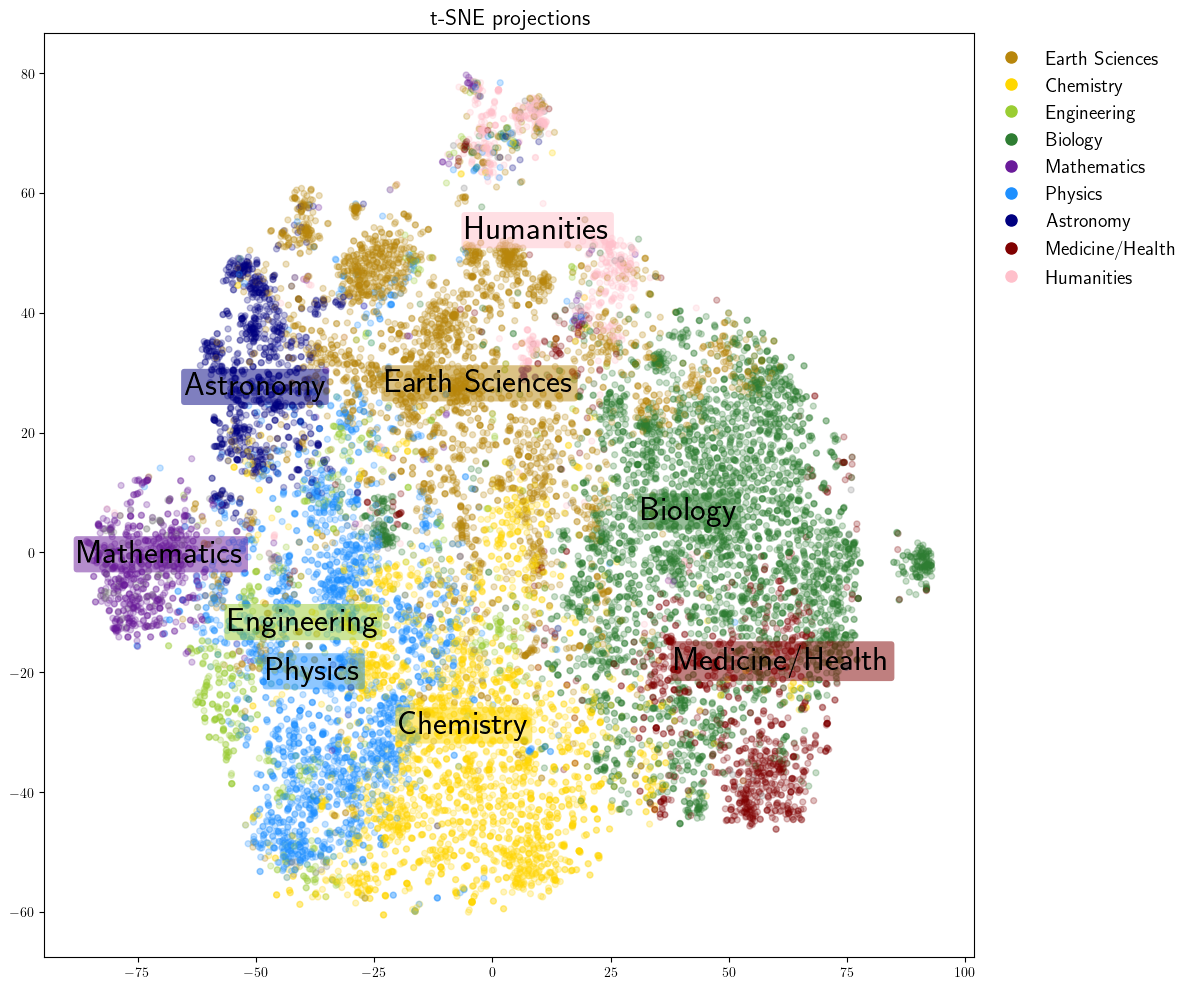

In [159]:
%matplotlib inline
plot_embedding_2D(tsne_embeddings, categories)

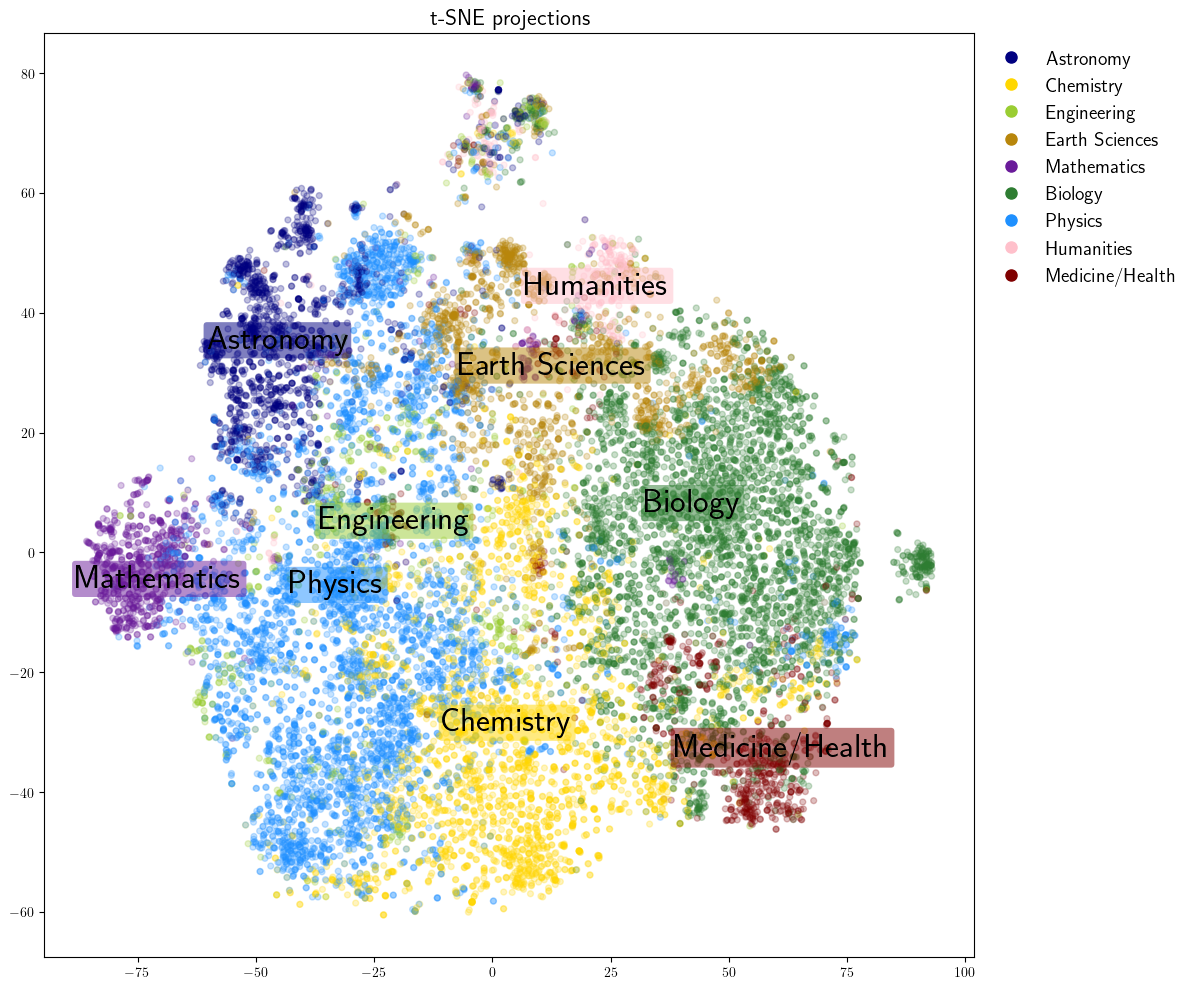

In [160]:
plot_embedding_2D(tsne_embeddings, zeroshot_classifier_categories)

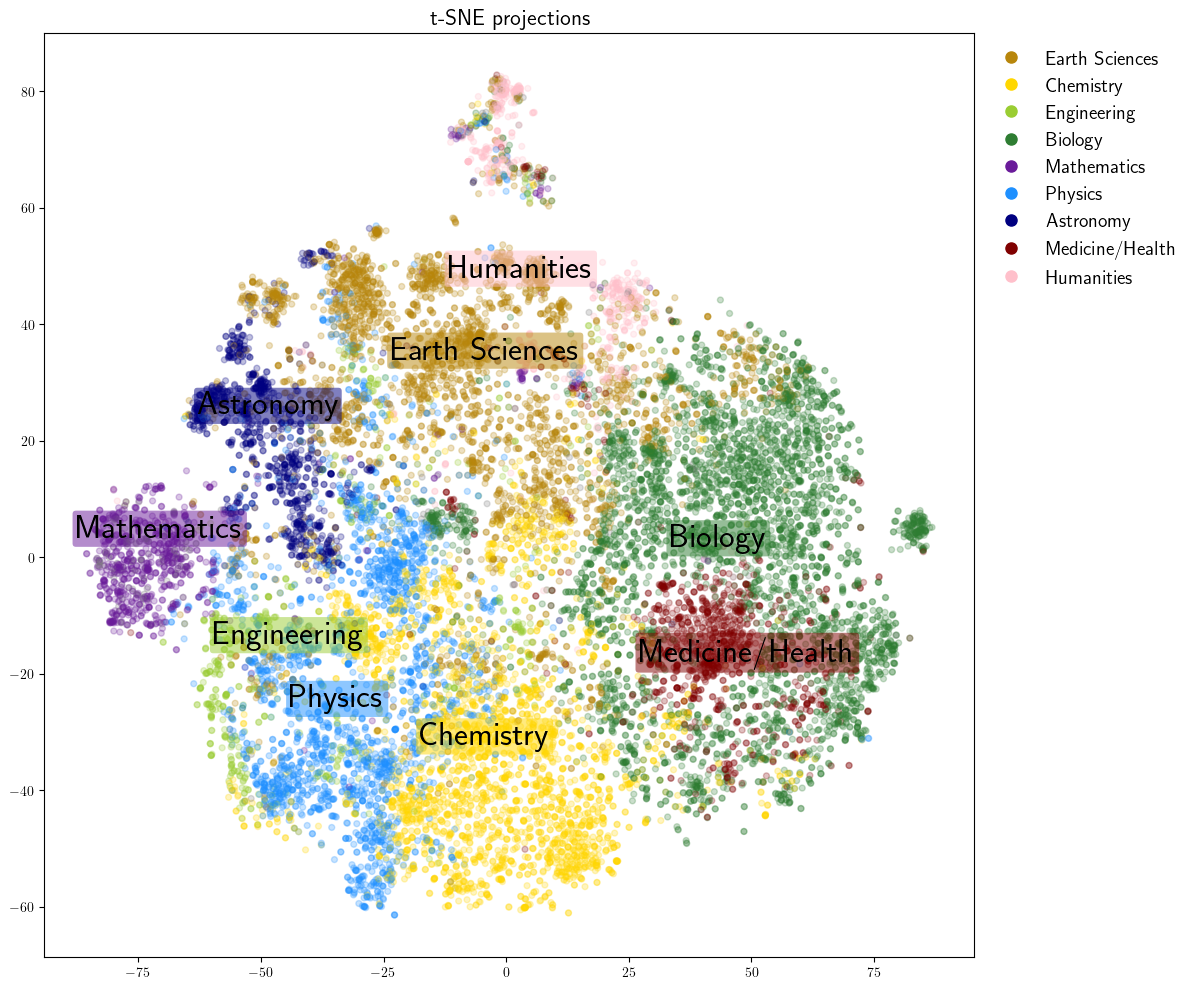

In [161]:
plot_embedding_2D(tsne_embeddings_2, categories)

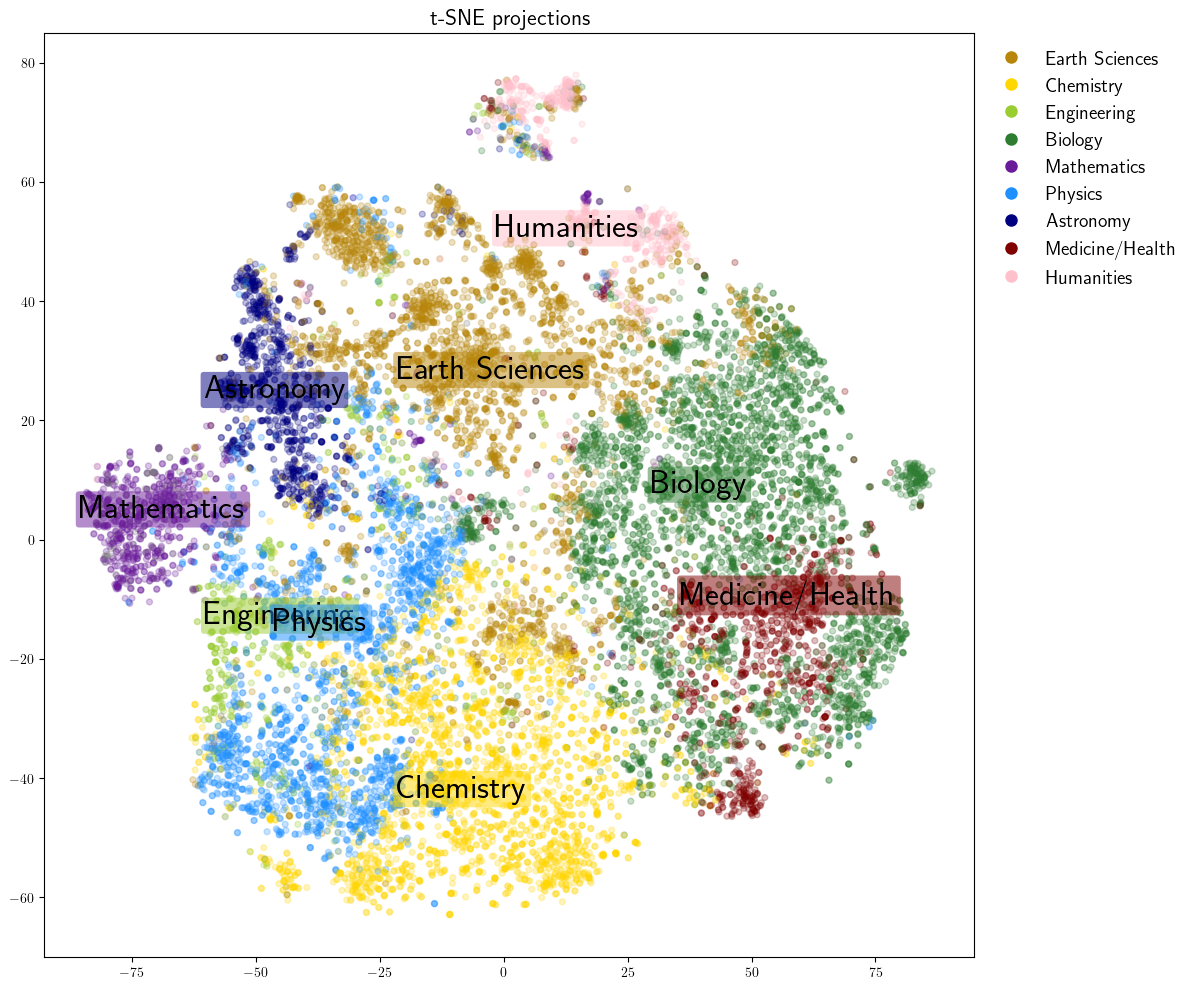

In [162]:
plot_embedding_2D(tsne_embeddings_topics, categories)

In [153]:
#plot_embedding_2D(tsne_embeddings_topics, zeroshot_classifier_categories)

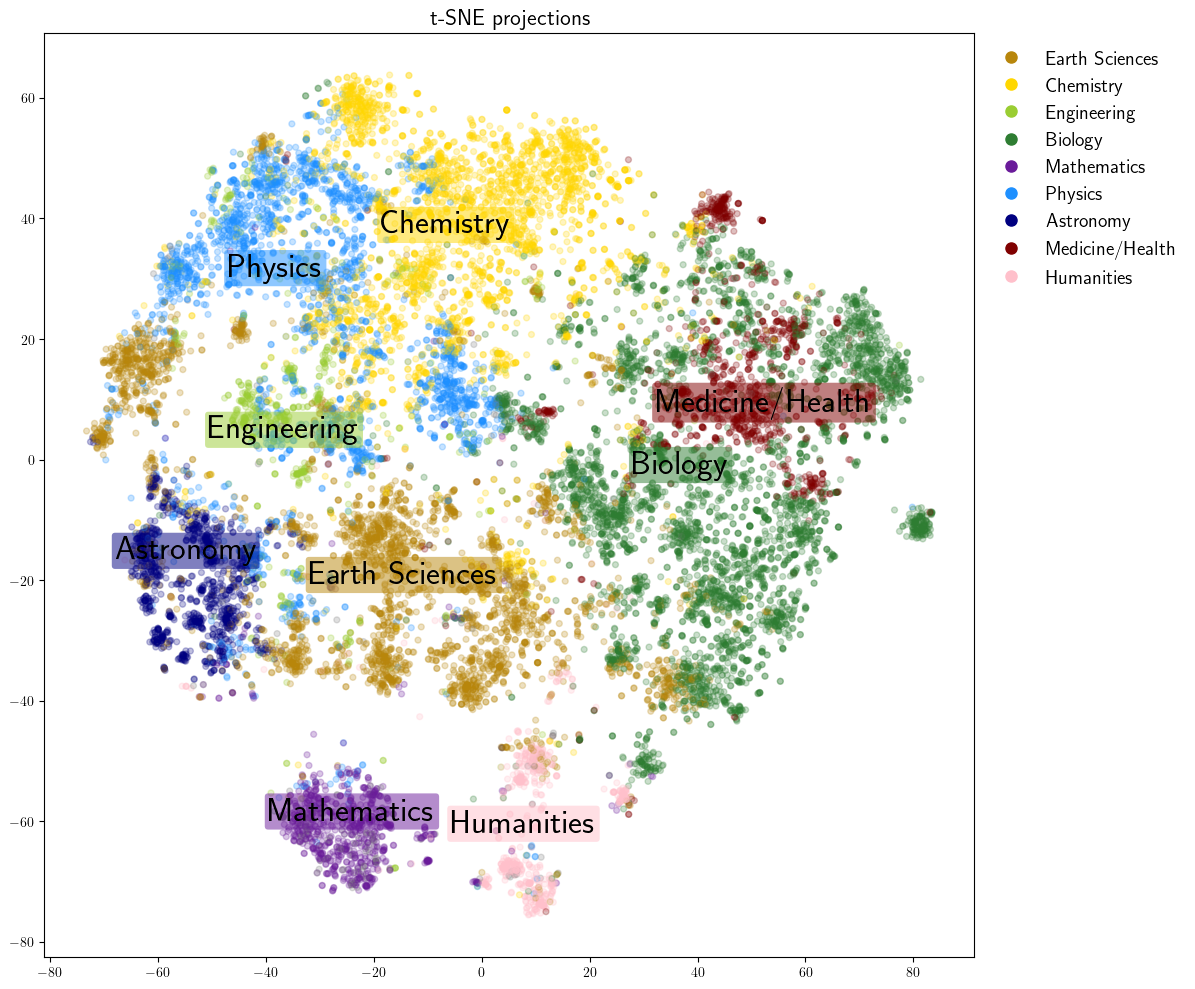

In [165]:
plot_embedding_2D(tsne_embeddings_only_topics, categories)

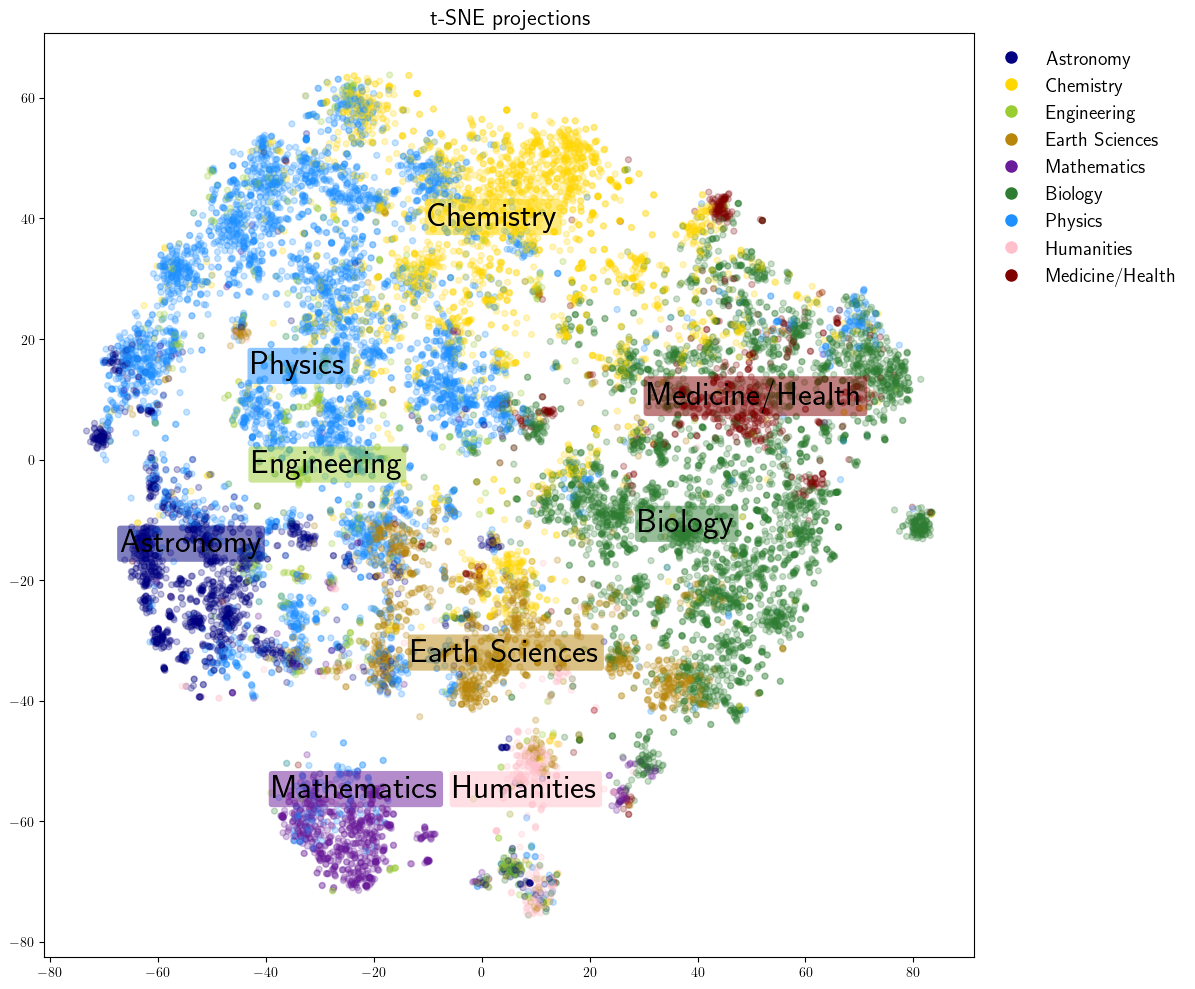

In [163]:
plot_embedding_2D(tsne_embeddings_only_topics, zeroshot_classifier_categories)

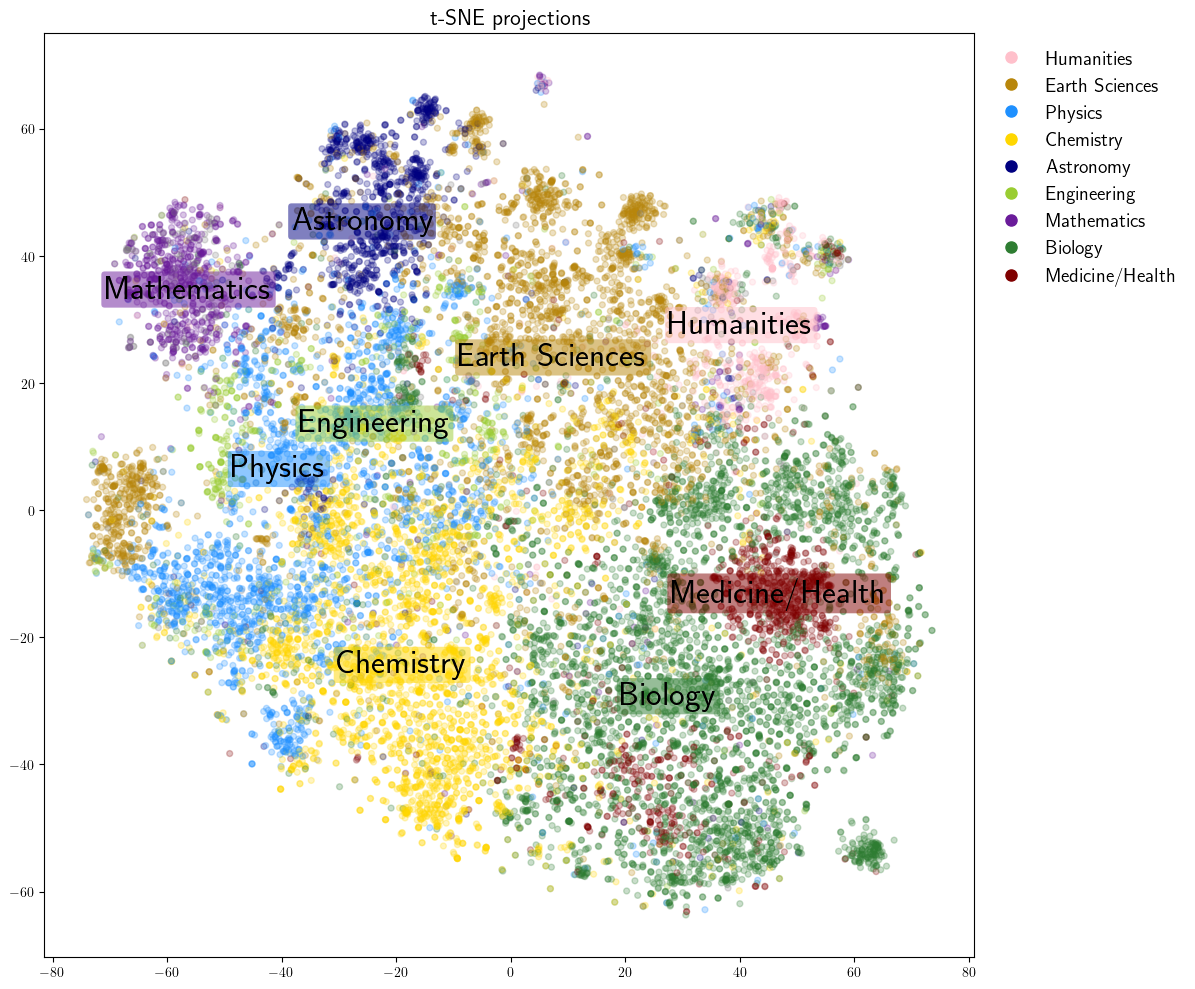

In [164]:
for i, cat in enumerate(categories_full_documents):
    if cat == "Earth Sciences":
        categories_full_documents[i] = "Environmental & Earth Sciences"

    elif cat == "Earth & Environmental Sciences":
        categories_full_documents[i] = "Environmental & Earth Sciences"

    elif cat not in category2color:
        categories_full_documents[i] = 'Other'

plot_embedding_2D(tsne_embeddings_full_documents, categories_full_documents)

In [80]:
doc2json['106498']

{'article_id': '106498',
 'revised_title': 'Experiments on Phlogiston and the Conversion of Water into Air',
 'topics': ['Phlogiston Theory',
  'Chemical Reactions',
  'Inflammable Air',
  'Caloric Theory',
  'Chemical Analysis'],
 'tldr': 'Joseph Priestley conducts experiments to investigate the nature of phlogiston and the conversion of water into air. He discovers that inflammable air, when heated, can convert calx of lead into metallic lead, suggesting that phlogiston is the same as inflammable air. This finding challenges the prevailing phlogiston theory and contributes to the development of the caloric theory.',
 'scientific_discipline': 'Chemistry',
 'scientific_subdiscipline': 'Analytical Chemistry & Chemical Reactions'}

In [81]:
all_words = [
    word.lower() for doc in doc2json for word in doc2json[doc]['tldr'].split()
]

In [92]:
all_words.count('combustion') # oxygen

69

In [118]:
all_words.count('combustible') # 

10

In [121]:
all_topics = [
    topic.lower() for doc in doc2json for topic in doc2json[doc]['topics']
]

In [124]:
all_topics.count('combustion')

49

In [128]:
for doc in doc2json:
    if 'Combustion' in doc2json[doc]['topics']:
        for k, v in doc2json[doc].items():
            print(f"{k}: {v}")
            
        print('---')

article_id: 107474
revised_title: New Experiments on the Composition of Phosphoric Acid
topics: ['Phosphorus Chemistry', 'Combustion', 'Phosphoric Acid', 'Chemical Reactions', 'Oxyge']
tldr: In this study, Sir H. Davy investigates the composition of phosphoric acid through various experiments, including burning phosphorus in a gaseous state in an excess of oxygen. He concludes that phosphoric acid is composed of approximately 100 parts phosphorus to 134.5 parts oxygen, and discusses the limitations of other methods used to determine the composition of phosphoric acid.
scientific_discipline: Chemistry
scientific_subdiscipline: Inorganic Chemistry & Compounds
---
article_id: 103817
revised_title: Frobenius' Experiments with Phosphorus and the Machina Frobeniana
topics: ['Phosphorus', 'Chemical Reactions', 'Combustion', 'Sublimation', 'Glass Production']
tldr: Sigismund August Frobenius demonstrates various experiments with phosphorus, including the Machina Frobeniana, a machine that impr